In [2]:
import galprime as gp

from astropy.table import Table

import numpy as np
from astropy.cosmology import WMAP9 as cosmo

from matplotlib import pyplot as plt

In [3]:
config = gp.read_config_file("myconfig.gprime")
arcconv = config["MODEL"]["ARCCONV"]

In [43]:

tab = Table.read("../pdata/Simard_BD_Table.fits")
tab = gp.check_and_remove_masked(tab)
print(tab.colnames)

tab_new = tab.copy()

Removed 1948 rows with masked values
['objID', 'z', 'Sp', 'Scale', 'Vmax', 'gg2d', 'e_gg2d', 'rg2d', 'e_rg2d', '__B_T_g', '__B_T_r', 'Re', 'e_Re', 'ellip_b', 'phib', 'Rd', 'e_Rd', 'i', 'e_i', 'phid', 'e_phid', 'ggMag', 'rgMag', 'nb', '_RA', '_DE', 'ellip_d']


In [50]:
size_cols = ["Re", "Rd", ]
tab_new = tab.copy()

pix_per_kpc = cosmo.arcsec_per_kpc_proper(tab_new["z"]).value / arcconv
mask = pix_per_kpc < 50
tab_new = tab_new[mask]
pix_per_kpc = pix_per_kpc[mask]

for col in size_cols:
    tab_new[col] = tab_new[col] * pix_per_kpc
    

tab_new.write("../pdata/Simard_BD_Table_pix.fits", overwrite=True)

/Users/hsouch/anaconda3/envs/jelly/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [11]:
tab = Table.read("../pdata/HSC-ZEST_CLEAN.fits")
print(tab.colnames)
tab_new = tab.copy()


['ID', 'FUV', 'NUV', 'u', 'uS', 'g', 'r', 'i', 'z', 'y', 'err_FUV', 'err_NUV', 'err_u', 'err_uS', 'err_g', 'err_r', 'err_i', 'err_z', 'err_y', 'Z_BEST', 'Z_BEST68_LOW', 'Z_BEST68_HIGH', 'RA_1', 'DEC_1', 'MU_MAX_u', 'MU_MAX_uS', 'MU_MAX_g', 'MU_MAX_r', 'MU_MAX_i', 'MU_MAX_z', 'PATCH', 'TRACT', 'ZPHOT', 'MASS_MED', 'MASS_INF', 'MASS_SUP', 'AGE_MED', 'SFR_MED', 'SSFR_MED', 'CLASS', 'SequentialID', 'RA_ZEST', 'DEC_ZEST', 'CAPAK_ID', 'CAPAK_RA', 'CAPAK_DEC', 'ACS_MAG_AUTO', 'ACS_MAGERR_AUTO', 'ACS_X_IMAGE', 'ACS_Y_IMAGE', 'ACS_XPEAK_IMAGE', 'ACS_YPEAK_IMAGE', 'ACS_ALPHAPEAK_', 'ACS_DELTAPEAK_', 'ACS_A_IMAGE', 'ACS_B_IMAGE', 'ACS_THETA_IMAGE', 'ACS_ELONGATION', 'ACS_CLASS_STAR', 'ACS_IDENT', 'ACS_SE', 'ACS_MU_CLASS', 'ACS_OVERLAP', 'ACS_NEARSTAR', 'ACS_MASK', 'ACS_MASKED', 'ACS_CLEAN', 'ACS_UNIQUE', 'GG', 'M20', 'CC', 'AA', 'R20', 'R50', 'R80', 'RPET', 'FLAGRPET', 'FLUX_GIM2D', 'LE_FLUX_GIM2D', 'UE_FLUX_GIM2D', 'R_GIM2D', 'LE_R_GIM2D', 'UE_R_GIM2D', 'ELL_GIM2D', 'LE_ELL_GIM2D', 'UE_ELL_GIM2D

In [14]:
size_cols = ["R_GIM2D"]
tab_new = tab.copy()

pix_per_kpc = cosmo.arcsec_per_kpc_proper(tab_new["z"]).value / arcconv
mask = pix_per_kpc < 50
tab_new = tab_new[mask]
pix_per_kpc = pix_per_kpc[mask]

for col in size_cols:
    tab_new[col] = tab_new[col] / config["MODEL"]["ARCCONV"] 

tab_new.write("../pdata/HSC-ZEST_CLEAN_pix.fits", overwrite=True)

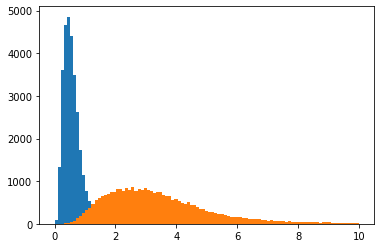

In [19]:
plt.hist(tab["R_GIM2D"], bins=np.linspace(0, 10, 100))
plt.hist(tab_new["R_GIM2D"], bins=np.linspace(0, 10, 100))
plt.show()

In [21]:
for r in [0.1, 0.5, 1.0, 1.5]:
    print(r, r / config["MODEL"]["ARCCONV"])

0.1 0.5952380952380952
0.5 2.976190476190476
1.0 5.952380952380952
1.5 8.928571428571429
